### Trabalhar com previsões de vendas de uma loja.
- Tratar os dados
- Formatar (se necessário)
- Treinar modelo
- prever a venda de dezembro
- Motnar um histograma dos dados
- Montar um plot de scatter

In [1]:
# Bibliotecas usadas
import pandas as pd
import matplotlib as plt
import seaborn as sns
# importar bibliotecas do sklearrn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700,2800, 2900, 3000, 3100, 3200, 3300]
    }

In [3]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas['mes_num'] = range(1, 13)

""" Mapear meses para números

meses_map = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3,
    'Abril': 4, 'Maio': 5, 'Junho': 6,
    'Julho': 7, 'Agosto': 8, 'Setembro': 9,
    'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}
df_vendas['mes_num'] = df_vendas['mes'].map(meses_map)





df_vendas.drop('mes', axis=1, inplace=True)
df_vendas"""

" Mapear meses para números\n\nmeses_map = {\n    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3,\n    'Abril': 4, 'Maio': 5, 'Junho': 6,\n    'Julho': 7, 'Agosto': 8, 'Setembro': 9,\n    'Outubro': 10, 'Novembro': 11, 'Dezembro': 12\n}\ndf_vendas['mes_num'] = df_vendas['mes'].map(meses_map)\n\n\n\n\n\ndf_vendas.drop('mes', axis=1, inplace=True)\ndf_vendas"

In [4]:
# Criar modelo
x = df_vendas[['mes_num']]
y = df_vendas['vendas']

# Dividir conjunto entre treino e teste
X_train, X_test, Y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Treinar o algoritmo de Regressão Linear - Modelo 
model = LinearRegression().fit(X_train, Y_train)

In [5]:
# Gerar predições do conjunto de testes com base no Modelo
y_pred = model.predict(X_test)

In [6]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [7]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5765.308510970324
R^2 Score: 0.9804933170681456


In [8]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2019.5530726256984
Coeficiente: [109.3575419]


In [9]:
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

NameError: name 'previsao_dezembro' is not defined

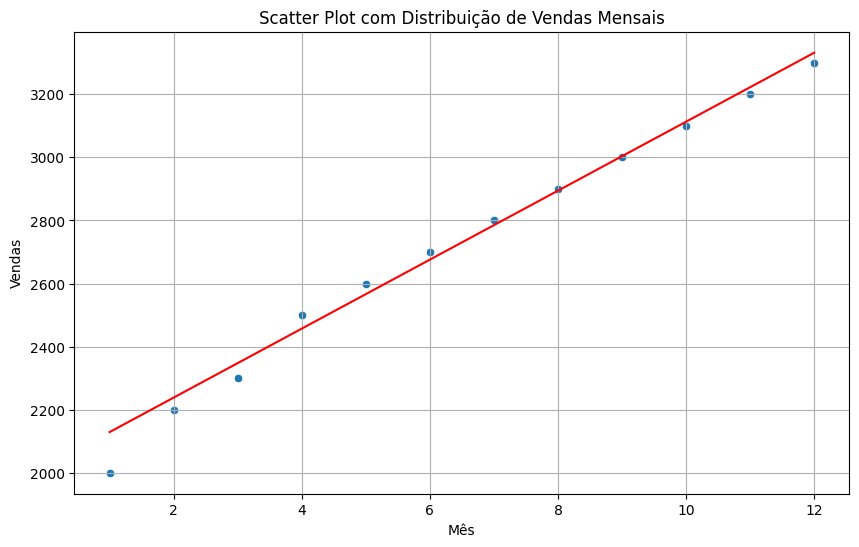

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_num', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_num'], model.predict(df_vendas[['mes_num']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

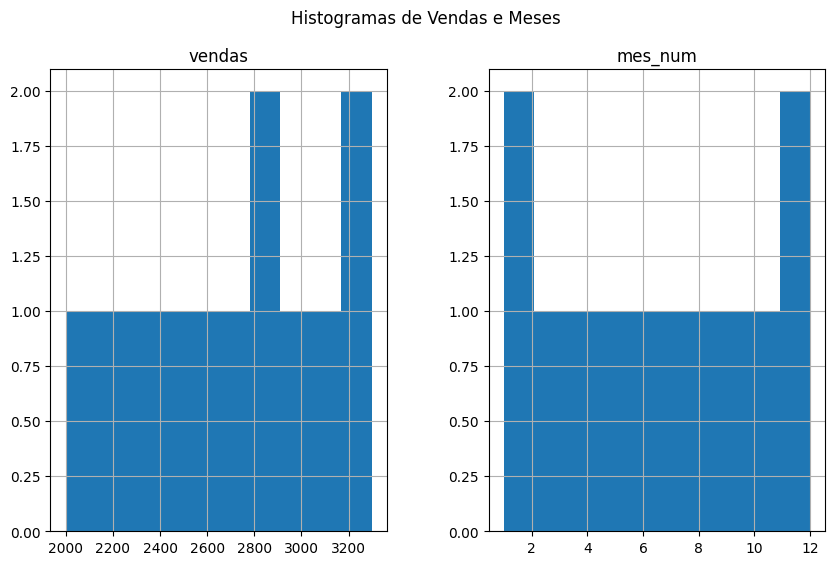

In [12]:
import matplotlib.pyplot as plt

# Histograma de todas as variáveis
df_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()